In [2]:
# requirements: numpy, matplotlib, scipy
# Written by Dawei Li
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [3]:
# two predictions for comparison
predict_1 = np.loadtxt("DDF/Result/10CenterVoltage.txt")
predict_2 = np.loadtxt("DDF/Result/100CenterVoltage.txt")
# measurements/true values
voltage = np.loadtxt("DDF/Experiment_Meliza_forecast_Window_Volt.txt")

OSError: DDF/Result/10CenterVoltage.txt not found.

In [ ]:
# simpling frequency: 50kHz, step size: 0.02ms
time_step = 0.02
# range of sigma_G
sigma_range = np.linspace(1, 100, 100)
cost_1 = []
cost_2 = []
for sigma in sigma_range:
    predict_conv_1 = gaussian_filter1d(predict_1, sigma, truncate=2)
    predict_conv_2 = gaussian_filter1d(predict_2, sigma, truncate=2)
    true_conv = gaussian_filter1d(voltage, sigma, truncate=2)
    cost_1.append((np.sum((predict_conv_1 - true_conv)**2))/len(voltage))
    cost_2.append((np.sum((predict_conv_2 - true_conv)**2))/len(voltage))
# convert the unit of sigma_G from step to ms
sigma_range_in_ms = sigma_range*time_step
print(cost_1)

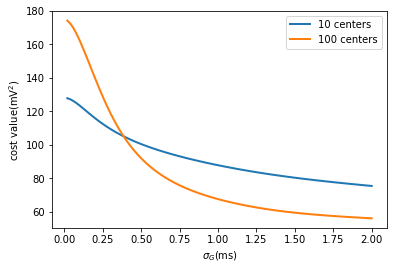

<Figure size 432x288 with 0 Axes>

In [4]:
plt.plot(sigma_range_in_ms, cost_1, linewidth = 2)
plt.plot(sigma_range_in_ms, cost_2, linewidth = 2)
plt.legend(("10 centers","100 centers")) 
plt.xlabel(r"$\sigma_G$(ms)")
plt.ylabel(r"cost value(mV$^2$)")
plt.show()
plt.savefig("DDF comparison with different centers.png", dpi=300)